In [ ]:
#Regression Assignment Objective:
#The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.

In [ ]:
#Dataset:
#Use the California Housing dataset available in the sklearn library. This dataset contains
#information about various features of houses in California and their respective median prices.

In [ ]:
#Key Components to be Fulfilled:
#1. Loading and Preprocessing (2 marks):

In [ ]:
#● Load the California Housing dataset using the fetch_california_housing function from sklearn.

In [ ]:
from sklearn.datasets import fetch_california_housing

#Load the dataset.
california = fetch_california_housing()

#Features (input variables).
X = california.data

#Target (median house value).
y = california.target

#Feature names.
feature_names = california.feature_names

#Dataset description.
print(california.DESCR)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
#● Convert the dataset into a pandas DataFrame for easier handling.

In [ ]:
import pandas as pd

#Convert features to DataFrame.
df = pd.DataFrame(X, columns=feature_names)

#Add target variable to DataFrame.
df['MedHouseValue'] = y

#Display first few rows.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Detecting outliers in the target variable using the IQR method.

Q1 = df['MedHouseValue'].quantile(0.25)
Q3 = df['MedHouseValue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -0.9808749999999995
Upper Bound: 4.824124999999999


In [ ]:
#Removing outliers based on IQR limits.

df = df[(df['MedHouseValue'] >= lower_bound) &
        (df['MedHouseValue'] <= upper_bound)]


In [ ]:
#Reset index after removing outliers.
#This ensures feature and target alignment during train-test split.

df = df.reset_index(drop=True)

In [ ]:
#● Handle missing values (if any) and perform necessary feature scaling (e.g.,standardization).

In [ ]:
df.isnull().sum() #Check whether the dataset contains any missing values.

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


In [ ]:
#Separate independent variables (features) and dependent variable (target).

X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

In [ ]:
#Train–Test Split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=42

)

# Display the size of training and testing datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (13698, 8)
Testing set size: (5871, 8)


In [ ]:
#Feature scaling.

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

#Fit only on training data.

X_train_std = std_scaler.fit_transform(X_train)

#Transform test data,

X_test_std = std_scaler.transform(X_test)

#Convert back to DataFrames.
X_train_scaled = pd.DataFrame(X_train_std, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_std, columns=X.columns)

X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-1.145563,0.449340,-0.477874,-0.076064,0.260508,0.156109,-0.766562,0.692842
1,-0.398500,-0.190795,-0.764740,0.041571,0.463699,0.070006,0.833605,-1.312267
2,-0.805884,-0.110778,-0.620060,-0.134873,0.436431,-0.043854,-1.411267,1.241503
3,-0.548789,-1.070980,0.087938,-0.196139,2.929254,0.020467,1.315974,-0.918229
4,1.194058,-0.830929,0.929838,-0.068295,-0.396562,-0.030623,-0.488272,-0.254847


In [ ]:
#● Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

### ***1. Loading the Dataset.***

The California Housing dataset was loaded using the **fetch_california_housing** function from the **sklearn library**.
This dataset contains information about housing-related features such as income, house age, location, and population, along with the target variable MedHouseValue, which represents the median house price.

Loading the dataset is the first step because it allows us to understand the structure, features, and target variable before applying any machine learning techniques.

***2. Converting Data into a Pandas DataFrame.***

After loading the dataset, it was converted into a **Pandas DataFrame**.
This makes the data easier to read, explore, and manipulate using familiar tabular operations such as column selection and summary checks.

The target variable (**MedHouseValue**) was added as a separate column so that all related data is available in a single table.

***3. Outlier Detection and Removal.***

Outliers were identified in the target variable (**MedHouseValue**) using the Interquartile Range (**IQR**) method. Extreme values can heavily influence regression models and lead to poor predictions.

Rows with target values outside the acceptable IQR range were removed to reduce the impact of extreme house prices and improve model stability.


***4. Checking for Missing Values.***

The dataset was checked for missing values using the i**snull().sum()** function.
This step is important because **missing values can affect model training and lead to incorrect predictions**.

In this dataset, no missing values were found, so no additional handling or imputation was required.

***5. Separating Features and Target.***

The independent variables (features) and the dependent variable (target) were separated.
All **input features** were stored in **X**, while the **target variable (MedHouseValue)** was stored in **y**.

This separation is necessary in supervised learning because the model needs input features to learn from and a target value to predict.

***6. Train–Test Split.***

The data was split into training and testing sets using train_test_split.
The training set is used to train the regression model, while the testing set is used to evaluate its performance on unseen data.

This split allows the model to be trained on one portion of the data and evaluated on unseen records, which gives a realistic measure of performance.

***7. Feature Scaling (Standardization).***

Feature scaling was applied using **StandardScaler**.
Only the training data was used to calculate the scaling parameters, and the same transformation was applied to the test data.

Standardization ensures that all features are on a similar scale, which helps the regression model perform better, especially when features have very different ranges.

In [ ]:
#2. Regression Algorithm Implementation (5 marks):
#● Implement the following regression algorithms:
          #○ Linear Regression.
          #○ Decision Tree Regressor
          #○ Random Forest Regressor
          #○ Gradient Boosting Regressor
          #○ Support Vector Regressor (SVR)

In [ ]:
#Linear Regression.

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#Display coefficients for each feature.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)
print("Intercept:", model.intercept_)


      Feature  Coefficient
0      MedInc     0.641765
1    HouseAge     0.089214
2    AveRooms    -0.222879
3   AveBedrms     0.251602
4  Population     0.003790
5    AveOccup    -0.042267
6    Latitude    -0.818050
7   Longitude    -0.792788
Intercept: 1.9121864483866233


In [ ]:
#Make Predictions.

y_pred = model.predict(X_test_scaled)

In [ ]:
#3. Model Evaluation and Comparison (2 marks):
#● Evaluate the performance of each algorithm using the following metrics:
#○ Mean Squared Error (MSE)
#○ Mean Absolute Error (MAE)
#○ R-squared Score (R2)

In [ ]:
#Model Evaluation.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.4603
Mean Squared Error (MSE): 0.3697
R-squared Score (R2): 0.5953


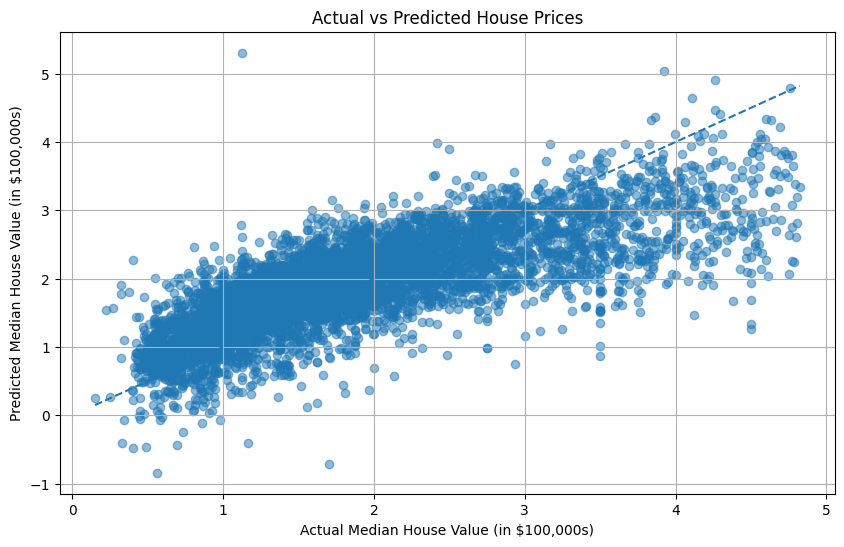

In [ ]:
# 1. Scatter Plot: Actual vs Predicted Values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)
plt.xlabel("Actual Median House Value (in $100,000s)")
plt.ylabel("Predicted Median House Value (in $100,000s)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

***Explanation for Linear Regression.***

**How it works :-**

Linear Regression predicts a continuous target variable by fitting a linear relationship between input features and the target. It finds the best-fitting line (or hyperplane in multiple dimensions) that minimizes the differences between predicted values and actual median house values, typically using mean squared error. Each feature is assigned a coefficient representing its contribution to the target, while the intercept indicates the baseline value when all features are zero.

**Why it is suitable for this dataset:-**

* The model uses standardized housing features such as **median income, house age, average rooms, and geographic location** to predict the median house value.
*  **Standardization** ensures all features are on a similar scale, improving model performance.
* **Outlier removal** reduces the influence of extreme house prices, leading to more stable predictions.
* The **train-test split** allows the model to be evaluated on unseen data, simulating real-world performance.
* **Coefficients** reveal the impact of each feature on housing prices, with median income and geographic location showing the strongest influence.
* The **R² score** indicates that the model explains a moderate portion of the variability in house prices, which is reasonable for complex, real-world data.
* The s**catter plot of actual vs predicted values** confirms that predictions are mostly consistent, though some deviations remain for extreme house prices.

In [ ]:
#○ Decision Tree Regressor.

#Train a basic Decision Tree Regressor.

from sklearn.tree import DecisionTreeRegressor

#Create the Decision Tree model.
dt_model = DecisionTreeRegressor(random_state=42)

#Train the model using training data.
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Evaluating model.
#Predictions using the trained Decision Tree model.
y_pred_dt = dt_model.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


print(f"Decision Tree Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R-squared Score (R2): {r2_dt:.4f}")


Decision Tree Regressor Evaluation:
Mean Absolute Error (MAE): 0.4259
Mean Squared Error (MSE): 0.4146
R-squared Score (R2): 0.5463


In [ ]:
#Control Overfitting.
dt_pruned = DecisionTreeRegressor(
    max_depth=5,           # Limit tree depth
    min_samples_leaf=5,    # Minimum samples per leaf
    random_state=42
)

#Train the pruned tree.
dt_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
#Re-evaluate the pruned Decision Tree.

#Make predictions on test data using the pruned model.
y_pred_pruned = dt_pruned.predict(X_test)

#Calculate evaluation metrics.
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)


print("Re-evaluation of Pruned Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae_pruned:.4f}")
print(f"Mean Squared Error (MSE): {mse_pruned:.4f}")
print(f"R-squared Score (R2): {r2_pruned:.4f}")

Re-evaluation of Pruned Decision Tree Regressor:
Mean Absolute Error (MAE): 0.4688
Mean Squared Error (MSE): 0.3907
R-squared Score (R2): 0.5724


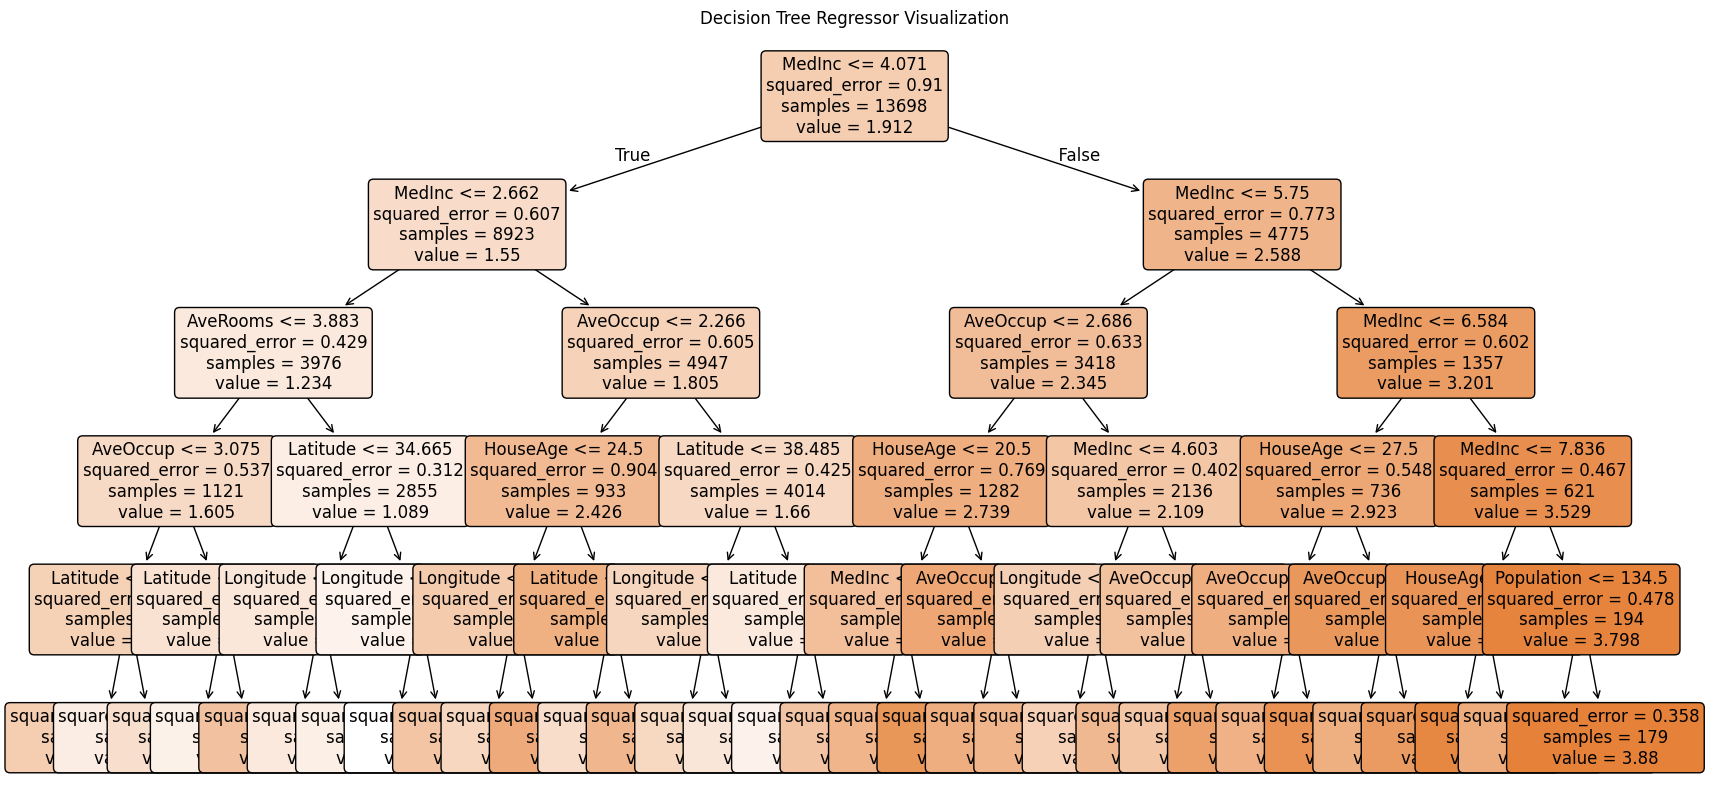

In [ ]:
#Visualize the Decision Tree Regressor.

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Plot the tree
tree.plot_tree(
    dt_pruned,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Decision Tree Regressor Visualization")
plt.show()

***Explanation for Decision Tree Regressor.***

**How it works :-**

A Decision Tree Regressor predicts a continuous target variable by recursively splitting the dataset into smaller subsets based on feature values. At each node, the algorithm selects the feature and threshold that minimize the variance (mean squared error) of the target variable in the resulting child nodes. This process continues until a stopping condition is met, such as maximum depth or minimum samples per leaf. The final prediction for a data point is the average target value of the leaf node it falls into.

**Why it is suitable for this dataset:-**

* The model uses housing-related features such as **median income, house age, average rooms, population, and geographic location** to predict median house values.
* **Outliers** were removed beforehand to prevent extreme house prices from dominating the splitting decisions.
* The dataset was **split into training and testing sets** to evaluate the model's ability to generalize to unseen data.
* A **pruned Decision Tre**e with limited depth and minimum samples per leaf was used to reduce overfitting and improve generalization.
* Decision Trees are well-suited for this dataset because they can **capture complex, non-linear relationships** between housing features and prices without assuming linearity.
* The algorithm **does not require feature scaling**, making it robust to variables with different units and ranges.
* The evaluation metrics show that the pruned tree achieves a balanced performance, capturing meaningful patterns while avoiding excessive complexity.
* The t**ree visualization** clearly illustrates how different features influence predictions, improving interpretability for real-world housing analysis.

In [ ]:
#○ Random Forest Regressor.

#Train Random Forest Model.

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
#Model Prediction.

y_pred = rf.predict(X_test)
y_pred[:10]

array([0.76632894, 1.05582598, 2.65461449, 1.30286953, 1.92083446,
       3.27483439, 2.55952164, 3.77153579, 3.64466953, 0.94886053])

In [ ]:
#Model Evaluation.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)


print(f"Random Forest Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared Score (R2): {r2_rf:.4f}")


Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.3305
Mean Squared Error (MSE): 0.2223
R-squared Score (R2): 0.7567


In [ ]:
#Feature Importance.

feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
MedInc,0.517939
AveOccup,0.134128
Longitude,0.109608
Latitude,0.099814
HouseAge,0.049639
AveRooms,0.046434
Population,0.023039
AveBedrms,0.019399


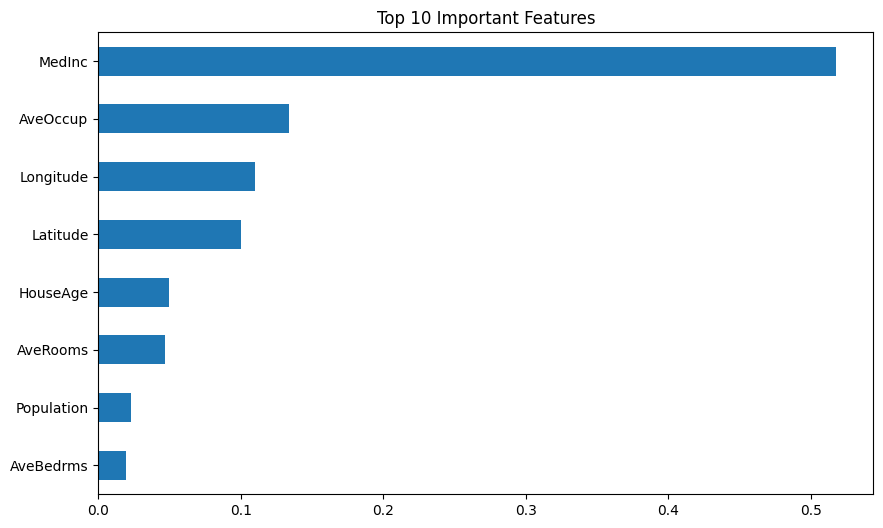

In [ ]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()



***Explanation for Random Forest Regressor.***

**How it works:-**

Random Forest Regressor is an ensemble learning algorithm that constructs multiple decision trees during training and combines their predictions to generate a final output. Each tree is trained on a random subset of the training data using bootstrapping, and at each split, a random subset of features is considered. This randomness reduces correlation between trees. The final prediction is obtained by averaging the predictions of all individual trees, which helps reduce variance, improve accuracy, and enhance model generalization.

**Why it is suitable for this dataset:-**

* The model uses housing-related features such as **median income, house age, average rooms, population, and geographic location** to predict median house values.
* Housing prices exhibit **complex and non-linear relationships**, which Random Forest can effectively capture without assuming linearity.
* The algorithm **does not require feature scaling**, making it suitable for datasets with features measured on different scales.
* Using multiple trees improves **robustness to noise and outliers**, especially after removing extreme target values during preprocessing.
* Limiting the maximum tree depth helps control overfitting while maintaining strong predictive performance.
* The model achieves a **high R² score**, indicating that it explains a large proportion of the variance in median house prices.
* Feature importance analysis provides **interpretability**, highlighting key factors such as median income and geographic location that strongly influence house prices.

Overall, Random Forest Regressor is highly effective for this dataset because it balances predictive accuracy, robustness, and interpretability when modeling real-world housing data.

In [ ]:
#Gradient Boosting Regressor.

from sklearn.ensemble import GradientBoostingRegressor

#Train Gradient Boosting Regressor.
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
#Make Predictions.

y_pred_gbr = gbr_model.predict(X_test)

In [ ]:
#Model Evaluation.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"R-squared Score (R2): {r2_gbr:.4f}")

Gradient Boosting Regressor Evaluation:
Mean Absolute Error (MAE): 0.3325
Mean Squared Error (MSE): 0.2157
R-squared Score (R2): 0.7639


In [ ]:
#Feature importance.

feature_importance_gbr = pd.Series(
    gbr_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

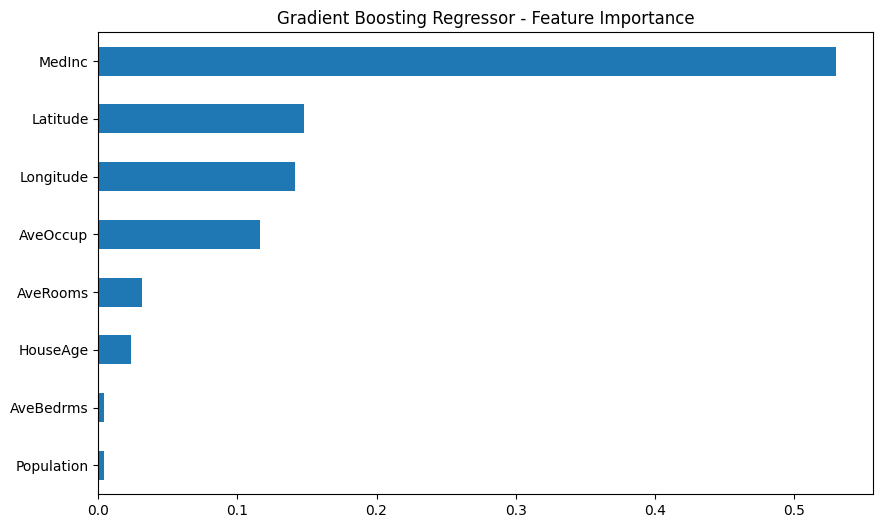

In [ ]:
feature_importance_gbr.plot(kind='barh', figsize=(10,6))
plt.title("Gradient Boosting Regressor - Feature Importance")
plt.gca().invert_yaxis()
plt.show()

**Explanation for Gradient Boosting Regressor.**

**How it works:-**

Gradient Boosting Regressor (GBR) is an ensemble learning algorithm that builds decision trees sequentially, where each new tree is trained to correct the errors (residuals) made by the previous trees. Instead of fitting all trees independently, GBR adds trees one at a time, and each tree’s contribution is controlled by a learning rate, which helps stabilize learning. By minimizing a specified loss function through gradient descent, the model gradually improves its predictions and reduces overall error. Using shallow trees (weak learners) allows the model to focus on refining predictions step by step rather than memorizing the data.

**Why it is suitable for this dataset:-**

* The California Housing dataset contains **complex, non-linear relationships** between features such as median income, house age, average rooms, population, and geographic location, which GBR can model effectively.
* The use of **shallow trees (max_depth = 3)** helps prevent overfitting while still capturing meaningful patterns in the data.
* Gradient Boosting **does not require feature scaling**, making it suitable for features with different ranges.
* The algorithm is **robust to moderate noise**, especially after removing extreme target outliers during preprocessing.
* The learning rate allows fine control over model complexity and improves generalization on unseen data.
* The **high R² score** indicates that the model explains a large portion of the variance in median house prices.
* Feature importance analysis provides interpretability, revealing key drivers such as median income and average occupancy.


Overall, Gradient Boosting Regressor is well suited for this dataset because it delivers strong predictive performance while effectively modeling non-linear patterns in real-world housing price data.



In [ ]:
#Support Vector Regressor (SVR).

from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

#Feature Scaling.
feature_scaler = StandardScaler()
X_train_svr = feature_scaler.fit_transform(X_train)
X_test_svr = feature_scaler.transform(X_test)

#Target Scaling.
target_scaler = StandardScaler()
y_train_svr = target_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()

#Train SVR model.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr_model.fit(X_train_svr, y_train_svr)

#Make Predictions.
y_pred_svr_scaled = svr_model.predict(X_test_svr)
y_pred_svr = target_scaler.inverse_transform(y_pred_svr_scaled.reshape(-1,1))


In [ ]:
#Model evaluation.

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"R-squared Score (R2): {r2_svr:.4f}")

Support Vector Regressor Evaluation:
Mean Absolute Error (MAE): 0.3377
Mean Squared Error (MSE): 0.2384
R-squared Score (R2): 0.7390


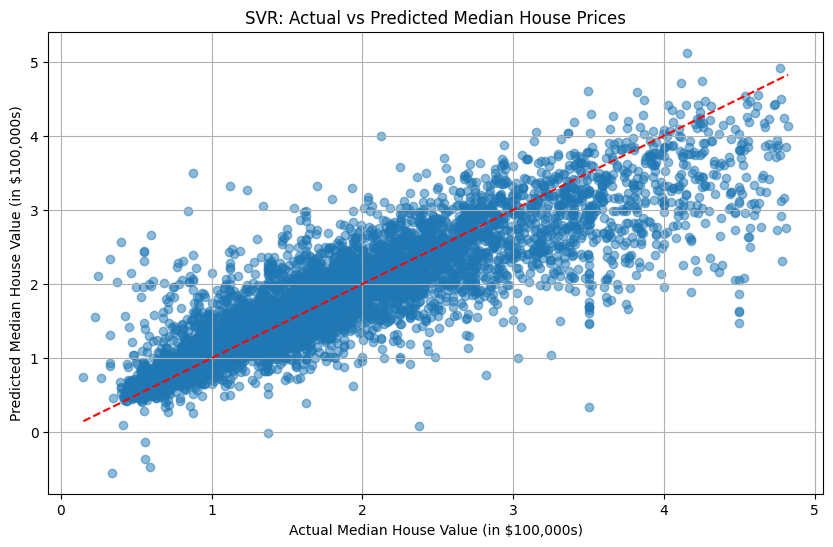

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel("Actual Median House Value (in $100,000s)")
plt.ylabel("Predicted Median House Value (in $100,000s)")
plt.title("SVR: Actual vs Predicted Median House Prices")
plt.grid(True)
plt.show()

***Explanation for Support Vector Regressor (SVR).***

**How it works:-**

Support Vector Regressor (SVR) is a supervised learning algorithm designed to predict continuous target variables by finding a function that best fits the data within a specified error margin, known as **epsilon (ε)**. Instead of minimizing overall error directly, SVR aims to keep prediction errors within this margin as much as possible. Only predictions that fall outside the epsilon boundary contribute to the loss function.

The **C parameter** controls the trade-off between model simplicity and penalty for errors outside the margin. A higher C value allows the model to fit the training data more closely. The **RBF kernel** maps the input features into a higher-dimensional space, enabling the model to capture non-linear relationships between features and the target variable.

**Why it is suitable for this dataset:-**

* The California Housing dataset contains **non-linear relationships** between features such as median income, house age, average rooms, population, and geographic location, which SVR with an RBF kernel can model effectively.
* **Feature scaling** is essential for SVR, and applying standardization to both input features and the target variable ensures fair contribution from all variables and improves convergence.
* After **outlier removal**, SVR becomes more stable and less sensitive to extreme target values.
* The use of **C = 100** allows the model to capture important patterns in the data while maintaining reasonable generalization.
* SVR performs well on structured tabular data where relationships are smooth but not strictly linear.
* The achieved **R² score** indicates that the model explains a significant portion of the variance in median house prices.
* The actual vs predicted scatter plot shows that SVR produces consistent predictions across different price ranges.


Overall, Support Vector Regressor is suitable for this dataset because it effectively handles non-linear patterns, benefits from proper scaling and preprocessing, and provides reliable predictions for housing price estimation.

In [ ]:
#Create a comparison DataFrame.
comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor (Pruned)",
        "Random Forest Regressor",
        "Gradient Boosting Regressor",
        "Support Vector Regressor"
    ],
    "MAE": [
        mae,
        mae_pruned,
        mae_rf,
        mae_gbr,
        mae_svr
    ],
    "MSE": [
        mse,
        mse_pruned,
        mse_rf,
        mse_gbr,
        mse_svr
    ],
    "R2_Score": [
        r2,
        r2_pruned,
        r2_rf,
        r2_gbr,
        r2_svr
    ]
})

#Display the comparison table.
print("Model Comparison:\n")
print(comparison)

#Identify the best and worst performing algorithms based on R2 Score.
best_model = comparison.loc[comparison['R2_Score'].idxmax()]
worst_model = comparison.loc[comparison['R2_Score'].idxmin()]

print("\nBest-performing Model:")
print(f"{best_model['Model']} with R2 Score = {best_model['R2_Score']:.4f}")

print("\nWorst-performing Model:")
print(f"{worst_model['Model']} with R2 Score = {worst_model['R2_Score']:.4f}")

Model Comparison:

                              Model       MAE       MSE  R2_Score
0                 Linear Regression  0.460284  0.369739  0.595345
1  Decision Tree Regressor (Pruned)  0.468789  0.390694  0.572411
2           Random Forest Regressor  0.330524  0.222296  0.756712
3       Gradient Boosting Regressor  0.332468  0.215686  0.763946
4          Support Vector Regressor  0.337748  0.238449  0.739033

Best-performing Model:
Gradient Boosting Regressor with R2 Score = 0.7639

Worst-performing Model:
Decision Tree Regressor (Pruned) with R2 Score = 0.5724


***Explanation for Best-Performing Algorithm: Gradient Boosting Regressor.***

**R² Score**: 0.7639 (highest among all models)

**MAE**: 0.3325

**MSE**: 0.2157

**Explanation and Justification:**



*   Gradient Boosting Regressor (GBR) is an **ensemble technique** that buildsdecision trees sequentially. Each new tree focuses on correcting the errors (residuals) of the previous trees. This iterative approach gradually improves predictions and reduces errors.
*   GBR is excellent for capturing **complex, non-linear relationships**, which are present in housing data due to interactions between features like income, house age, location, and occupancy.
*   The high R² score (0.7639) indicates that GBR **explains approximately 76% of the variance** in median house values, which is significantly better than other models.
*  The relatively low MAE and MSE suggest that predictions are **accurate and consistent**, with fewer large deviations from actual values.
*   Feature importance analysis shows that GBR effectively identifies the most influential features (e.g., Median Income, AveOccup), making the model **interpretable** in addition to being accurate.


**Conclusion**: Gradient Boosting Regressor is the best-performing model because it balances **accuracy, interpretability, and robustness**, handling non-linearities and interactions better than other models.

***Explanation for Worst-Performing Algorithm: Decision Tree Regressor (Pruned).***

**R² Score**: 0.5724 (lowest among all models)

**MAE**: 0.4688

**MSE**: 0.3907

**Explanation and Reasoning:**

*   The pruned Decision Tree was restricted with **max_depth=5** and **min_samples_leaf=5** to prevent overfitting. While pruning reduces variance, it also limits the tree's ability to **capture complex patterns** in the data.
*   The lower R² score (0.5724) indicates that the model explains only around **57% of the variance** in median house prices, which is considerably less than ensemble models like GBR or Random Forest.
*   Although the model is simpler and easier to interpret, the high MAE and MSE show that the predictions **have larger deviations** compared to other models.
*   Decision Trees are prone to **underfitting when pruned excessively**, which is likely the reason this model performs worse than more sophisticated ensemble methods.

**Conclusion**: The pruned Decision Tree is the worst-performing model because, while it avoids overfitting, it fails to capture the complex relationships in the California Housing dataset, resulting in lower predictive accuracy.



